# Principal Component Analysis


![](https://www.bing.com/th?id=OIP.glYgZBfxYkj0V3MaAg8MdgHaEK&pid=Api&rs=1)


https://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/dimensionality_reduction/projection/principal_component_analysis.ipynb

# Principal Component Analysis (PCA)
__PCA__ is an unsupervized algo that is used for feature extraction in _high dimensional and correlated data_. PCA achieves dimensionality reduction by transforming features into orthogonal componetnt axes of maximum variances in a datasert. 


In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

Our iris dataset is now stored in form of a 150×4 matrix where the columns are the different features, and every row represents a separate flower sample. Each sample row x can be pictured as a 4-dimensional vector 

$\mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix}$


## A Summary of the PCA Apprach
1. Standardize the data
2. Obtain the __Eigenvectors__ and __Eigenvalues__ from the covariance matrix or correlation matrix, or perofrm _Singular Value Decomposition_.
3. Sort eigenvalues in descending order and choose the $k$ eigenvectors tha correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k \le d$)
4. Construct the projection matrix $W$ from the selected $k$ eigenvectors
5. Transform the original dataset $X$ via $W$ to obtain a $k$-dimensional feature subspace $Y$. 

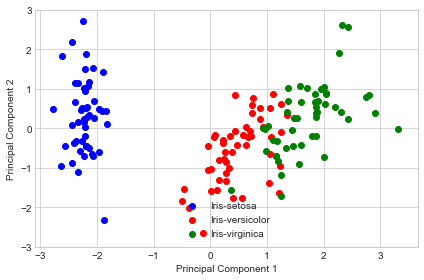

In [21]:
# 1. Standarize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# 2. 
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [30]:
print("Step 2. Covariance Matrix \n", sklearn_pca.get_covariance())

Step 2. Covariance Matrix 
 [[ 0.9779242  -0.10104477  0.87069468  0.86134879]
 [-0.10104477  1.00395722 -0.41916911 -0.37286994]
 [ 0.87069468 -0.41916911  1.04639367  0.93676197]
 [ 0.86134879 -0.37286994  0.93676197  0.99857055]]


#### Exploratory Visualization 

Below are the 3 differnet flower classes are distributed along the 4 different features, visuzlaied via histograms.

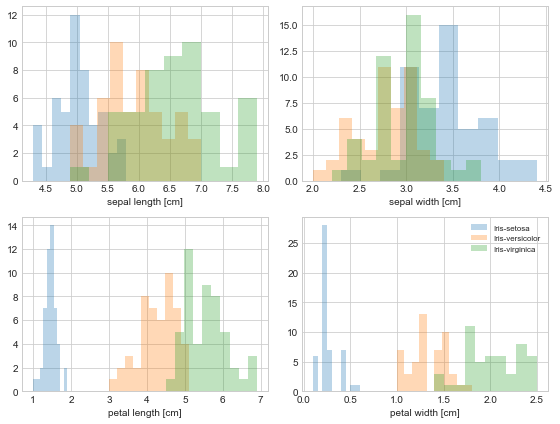

In [18]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

### 1. Standardize the Dataset

In [40]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### 2. Eigendecomposition - Computing Eigenvectors and Eigenvalues

In [43]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


__Next, we perform an eigendecomposition on the covariance matrix:__

In [44]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


__Eigendecomposition of the standardized data based on the correlation matrix:__

In [45]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


__Eigendecomposition of the raw data based on the correlation matrix:__

In [46]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

* Eigendecomposition of the covariance matrix after standardizing the data
* Eigendecomposition of the correlation matrix.
* Eigendecomposition of the correlation matrix after standardizing the data.

#### Singular Vector Decomposition

In [47]:
u,s,v = np.linalg.svd(X_std.T)
print('Vectors U:\n', u)

Vectors U:
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


### Sorting Eigenpairs

In [49]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Everything ok!
Eigenvalues in descending order:
2.910818083752054
0.9212209307072242
0.14735327830509573
0.020607707235625678


### Explained Variance

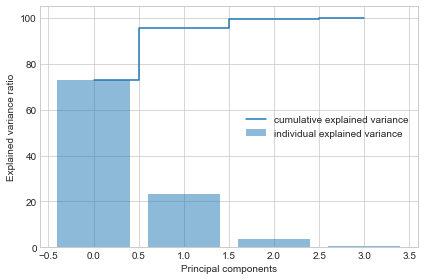

In [50]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    #plt.savefig('/Users/Sebastian/Desktop/pca2.pdf')

### Projection Matrix

In [51]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


### Projection Onto the New Feature Space



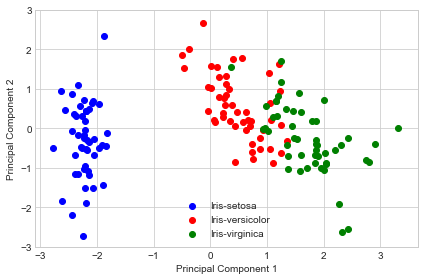

In [52]:
Y = X_std.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()

    #plt.savefig('/Users/Sebastian/Desktop/pca1.pdf')